# 🧪 Medical Test Cost Estimator
This notebook builds a predictive model to estimate medical test costs for PathoLab Diagnostics.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [18]:
df = pd.read_csv("Medical Test Cost Estimator for PathoLab Diagnostics.csv")
df.head()


,gender,age,test_type,insurance_status,lab_service_fee,preparation_required,home_sample_collection,urgency_level,estimated_test_cost_inr
0,Male,56,Lipid Profile,Insured,212.62,No,No,Routine,835.73
1,Male,42,COVID-19 RT-PCR,Not Insured,344.36,No,No,Routine,1570.51
2,Male,48,COVID-19 RT-PCR,Insured,264.30,Yes,No,Emergency,2435.48
3,Female,17,ECG,Insured,456.41,No,Yes,Priority,1664.72
4,Male,45,Lipid Profile,Not Insured,385.73,No,No,Priority,1658.44


In [19]:
X = df.drop("estimated_test_cost_inr", axis=1)
y = df["estimated_test_cost_inr"]

categorical_cols = ["gender", "test_type", "insurance_status", "preparation_required", "home_sample_collection", "urgency_level"]
numeric_cols = ["age", "lab_service_fee"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


In [20]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: ₹{mae:.2f}")
print(f"RMSE: ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: ₹132.58
RMSE: ₹170.64
R² Score: 0.99


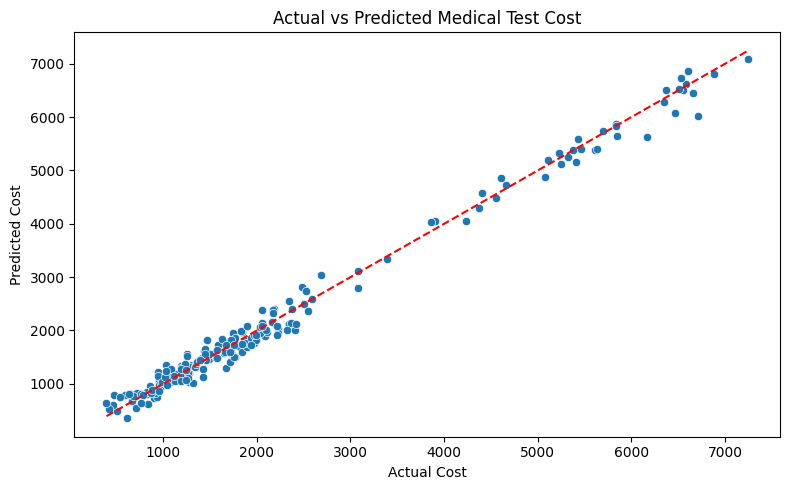

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted Medical Test Cost")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


In [24]:
import joblib
joblib.dump(model, "test_cost_estimator_model.pkl")


['test_cost_estimator_model.pkl']